In [21]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [22]:
import os
import glob
import argparse
import pickle
import matplotlib.image as mpimg
from matplotlib.pyplot import figure
from IPython import display
import time

%matplotlib inline
import numpy as np
import torch
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import SubsetRandomSampler, Subset
from torchvision.utils import save_image
import torch.nn as nn
from torch import Tensor
import torch.nn.functional as F
import torch.optim as optim

import torchvision.utils as vutils
from torch.utils.data import DataLoader
from torch.autograd import Variable
from tqdm import tqdm

from OTGAN.SinkhornDistance import loss_func
from OTGAN.dataset import load_MNIST, load_CIFAR10
from OTGAN.Generator import Generator
from OTGAN.Discriminator import Discriminator


from OTGAN.utils import *
#import ot
%load_ext autoreload
%autoreload 2
%reload_ext autoreload



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Generated images

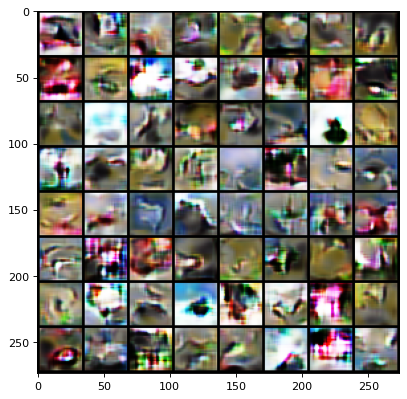

In [20]:
figure(figsize=(8, 6), dpi=80)
PATH_IMAGE = "generated_image_CIFAR/epoch_{}.png"

for i in range(1,25):
    p = PATH_IMAGE.format(i)
    #print(p)
    image = mpimg.imread(p) # images are color images
    plt.gca().clear()
    plt.imshow(image);
    display.display(plt.gcf())
    display.clear_output(wait=True)
    time.sleep(1.0) # wait one second

> We see that the generated image improves with training

# Inception score

In [12]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
from OTGAN.InceptionScore import inception_score

In [15]:
cifar_testset = datasets.CIFAR10(root='./data_CIFAR10', download=False,
                            transform=transforms.Compose([
                                transforms.Resize(32),
                                transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                            ])
   )

The base mean inception score (and standard deviation)for the whole dataset is

In [121]:
print(score)

(9.672786535487132, 0.1499138602581282)


---

## Inception Score OT-GAN

We will retrieve the pickled Inception score, we computed this score by generating for each epoch 100 random batch images. 

In [29]:
with open('results/pickled_result_64.pkl','rb') as f :
    (icp, (G_loss, D_loss)) = pickle.load(f)

In [30]:
G_loss= np.array(G_loss)
D_loss= np.array(D_loss) 
loss = G_loss-D_loss

############################ Printing Generator/ Critic loss ############################


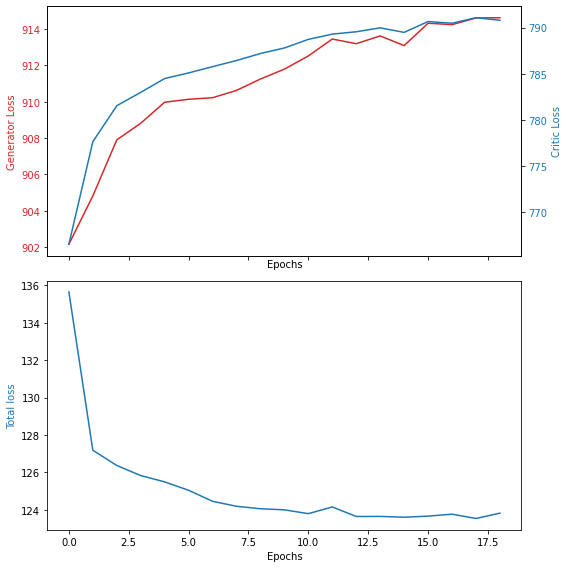

In [31]:
# Create some mock data
t = list(range(len(G_loss)))


print('############################ Printing Generator/ Critic loss ############################')

fig, (ax1,ax3) = plt.subplots(2,figsize=(8,8),sharex=True)

color = 'tab:red'
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Generator Loss', color=color)
ax1.plot(t, G_loss, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Critic Loss', color=color)  # we already handled the x-label with ax1
ax2.plot(t, D_loss, color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Plotting total Loss
ax3.plot(loss)
ax3.set_xlabel('Epochs')
ax3.set_ylabel('Total loss', color=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
#plt.savefig('loss_batch_size_100.png')
plt.show()


############################ Printing Inception score per epoch ############################


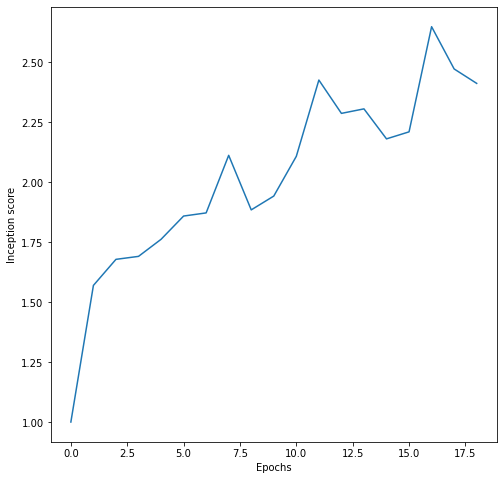

In [33]:
print('############################ Printing Inception score per epoch ############################')
fig, ax = plt.subplots(figsize=(8,8))

ax.plot(icp)
ax.set_ylabel('Inception score')
ax.set_xlabel('Epochs')
#ax.set_title('Inception score for each epoch-batch size=100')
#plt.savefig('results/inception_score_100.png')

plt.show()
